<a href="https://colab.research.google.com/github/gytjr8422/SOCAR-AI-BOOT-CAMP/blob/codeReview/%EA%B9%80%ED%9A%A8%EC%84%9D_Assignment_1_ETA_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/tada_eta.xlsx')
print(tada_eta.columns)
tada_eta.head()

Index(['ATA', 'id', 'api_eta', 'created_at_kst', 'month', 'pickup_lng',
       'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat',
       'hour'],
      dtype='object')


,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [ ]:
# pickup_gu를 categorical feature로 만들기
import sklearn.preprocessing
enc = sklearn.preprocessing.OrdinalEncoder(dtype=np.int32)
ordinal = enc.fit_transform(np.asarray(tada_eta['pickup_gu']).reshape(-1,1))
tada_eta['pickup_gu'] = ordinal[:,0]

In [ ]:
tada_eta['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*100000
tada_eta = tada_eta.drop(['id', 'created_at_kst', 'driver_id', 'pickup_lng', 'pickup_lat', 'driver_lng','driver_lat'],1)
tada_eta.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ATA,api_eta,month,pickup_gu,hour,distance
0,10.60,5.65,12,8,0,52.400202
1,9.20,8.60,12,2,0,44.465889
2,10.85,10.53,12,7,0,149.731535
3,5.52,1.92,7,23,0,1.000535
4,8.60,7.10,7,23,0,35.014797


In [ ]:
tada_eta = tada_eta.sample(frac=1, random_state=0).reset_index(drop=True)

In [ ]:
tada_eta.head()

,ATA,api_eta,month,pickup_gu,hour,distance
0,6.13,8.32,12,12,22,44.521977
1,5.37,3.05,12,17,11,3.989066
2,6.27,5.00,7,22,19,4.814699
3,10.52,8.47,12,20,21,77.341173
4,12.45,6.65,7,0,12,14.888851


In [ ]:
train = tada_eta[:12000]
test = tada_eta[12000:]
train

,ATA,api_eta,month,pickup_gu,hour,distance
0,6.13,8.32,12,12,22,44.521977
1,5.37,3.05,12,17,11,3.989066
2,6.27,5.00,7,22,19,4.814699
3,10.52,8.47,12,20,21,77.341173
4,12.45,6.65,7,0,12,14.888851
...,...,...,...,...,...,...
11995,6.48,8.32,12,14,22,19.706567
11996,8.88,4.52,12,10,13,6.816933
11997,19.75,14.00,7,8,20,275.213141
11998,6.88,7.05,12,12,8,9.174657


In [ ]:
# api_eta와 distance만 정규화하기 위한 데이터 수정
x_train = np.asarray(train.drop(['ATA', 'month', 'hour', 'pickup_gu'], 1))
y_train = np.asarray(train['ATA'])

x_test = np.asarray(test.drop(['ATA', 'month', 'hour', 'pickup_gu'], 1))
y_test = np.asarray(test['ATA'])

month_train = np.asarray(train['month'])
month_test = np.asarray(test['month'])
hour_train = np.asarray(train['hour'])
hour_test = np.asarray(test['hour'])
pickup_gu_train = np.asarray(train['pickup_gu'])
pickup_gu_test = np.asarray(test['pickup_gu'])

eta_features = [x for i, x in enumerate(tada_eta.columns) if i!=0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[3.72759857e-01, 2.53883532e-08],
       [1.36648746e-01, 2.27473771e-09],
       [2.24014337e-01, 2.74554906e-09],
       ...,
       [6.27240143e-01, 1.56938412e-07],
       [3.15860215e-01, 5.23178562e-09],
       [3.76344086e-01, 8.26572331e-09]])

In [ ]:
# 정규화한 x_train 및 x_test와 month, hour, pickup_gu 데이터 이어 붙이기
x_train = pd.DataFrame(x_train)
x_train['month'] = month_train
x_train['hour'] = hour_train
x_train['pickup_gu'] = pickup_gu_train

x_test = pd.DataFrame(x_test)
x_test['month'] = month_test
x_test['hour'] = hour_test
x_test['pickup_gu'] = pickup_gu_test

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [ ]:
x_train

array([[3.72759857e-01, 2.53883532e-08, 1.20000000e+01, 2.20000000e+01,
        1.20000000e+01],
       [1.36648746e-01, 2.27473771e-09, 1.20000000e+01, 1.10000000e+01,
        1.70000000e+01],
       [2.24014337e-01, 2.74554906e-09, 7.00000000e+00, 1.90000000e+01,
        2.20000000e+01],
       ...,
       [6.27240143e-01, 1.56938412e-07, 7.00000000e+00, 2.00000000e+01,
        8.00000000e+00],
       [3.15860215e-01, 5.23178562e-09, 1.20000000e+01, 8.00000000e+00,
        1.20000000e+01],
       [3.76344086e-01, 8.26572331e-09, 7.00000000e+00, 7.00000000e+00,
        1.40000000e+01]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_leaf': [30, 35, 40],
              'learning_rate':[0.05, 0.1, 0.5],
              'max_iter': [60, 65, 70, 75, 80]
              }

# train set과 test set의 input과 output를 각각 이어 붙여서 X,y를 정의
X = np.concatenate((x_train,x_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)

# 전체 데이터 X에서 training data에 해당하는 index는 -1, test data에 해당하는 index는 0이 되도록,
# 여기서는 [-1, -1, ... , -1, 0, 0, ... , 0] 같은 형태의 1차원 배열 test fold와 predefined split을 정의
pds = PredefinedSplit(test_fold=[-1]*len(x_train)+[0]*len(x_test))

# grid search 모델 정의, 학습 및 model selection
grid_search = GridSearchCV(estimator=HistGradientBoostingRegressor(random_state=0, categorical_features=[2, 3, 4]), 
                           param_grid=param_grid, 
                           cv=pds, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)
print(grid_search.best_params_)

Fitting 1 folds for each of 180 candidates, totalling 180 fits
{'learning_rate': 0.1, 'max_depth': 2, 'max_iter': 70, 'min_samples_leaf': 35}


In [ ]:
reg = HistGradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_leaf=35, max_iter=70, random_state=0, categorical_features=[2, 3, 4])
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_test, x_test[:,0]) ))

mae = mean_absolute_error(y_test, reg.predict(x_test))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_test, x_test[:,0]) ))

The mean squared error (MSE) on test set: 8.2415
The initial error of API ETA on test set: 82.7810
The mean absolute error (MAE) on test set: 2.0684
The initial error of API ETA on test set: 8.1702


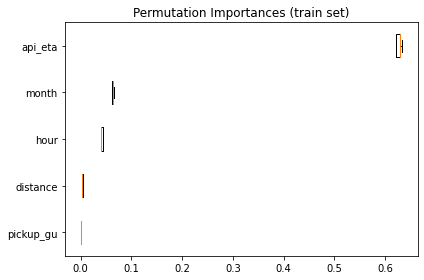

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(reg, x_train, y_train)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=np.array(eta_features)[sorted_idx]
)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()